对于np难组合优化问题，对于单个问题可以解决，但是对于大量的数目只能枚举出最优解。

启发式算法：并不保证找到最优解，但是可以在有限资源的情况下找到还不错的解。

模拟退火：为了不被局部最优解困住，需要以一定的概率跳出当前的的位置，暂时接受一个比较差的解。在搜索最优解的过程中，在前期跳脱的概率较高，进行广泛搜索；后期跳脱概率小，尽量收敛到较优解。

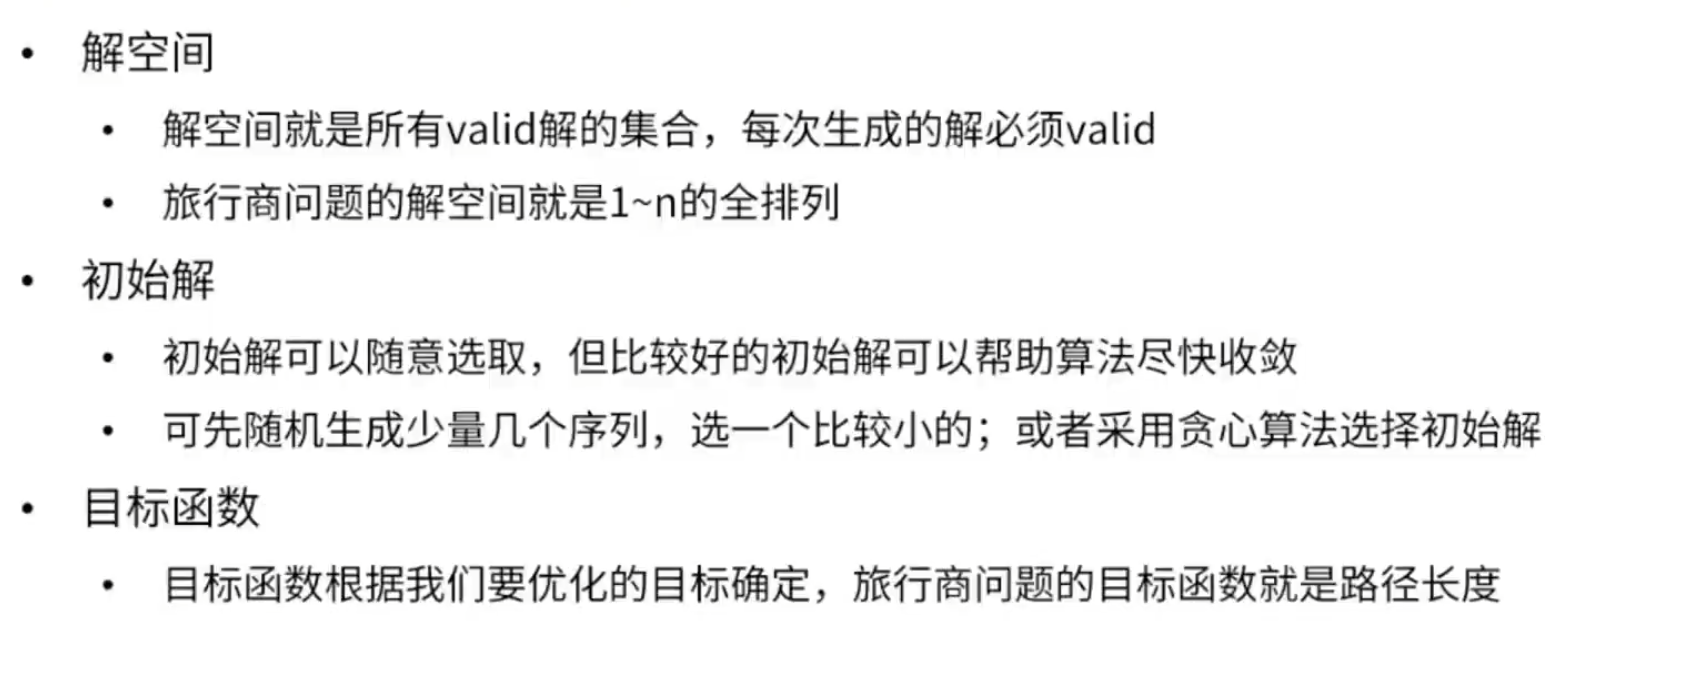

In [1]:
from turtledemo.planet_and_moon import G

from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-27 135125.png")

可以加入梦卡罗特和多次跑启发式算法

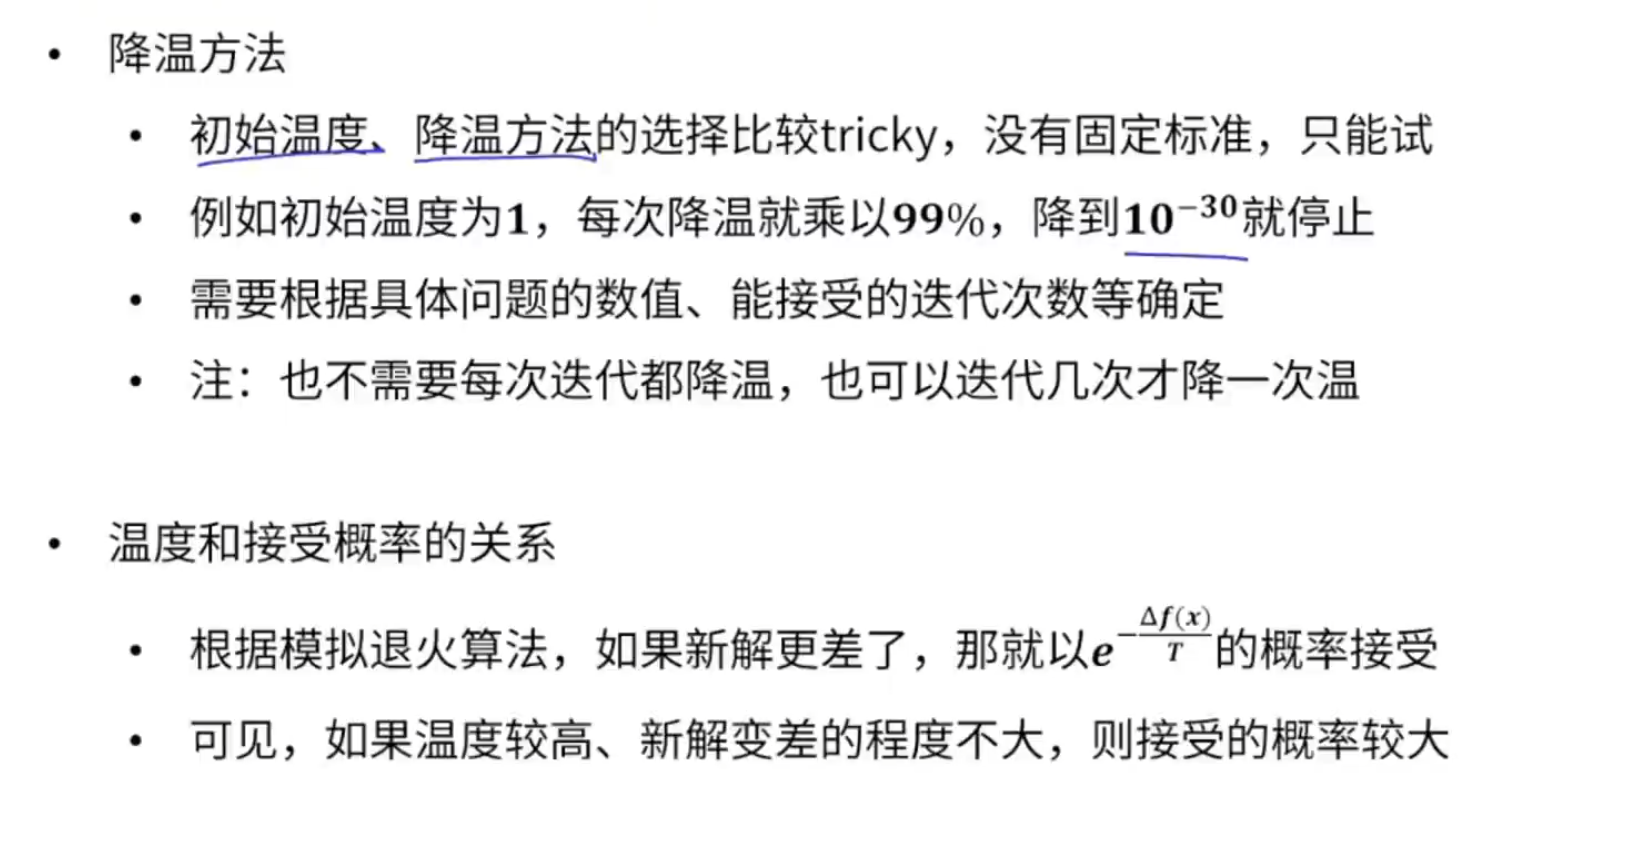

In [2]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-27 135230.png")

降温方法等原理性的东西需要在论文上写，关于初始温度和降温方法，

关于如何生成的新的解需要浓墨重彩的解释一下，并且保证新解是valid并且与旧解没有太大差异

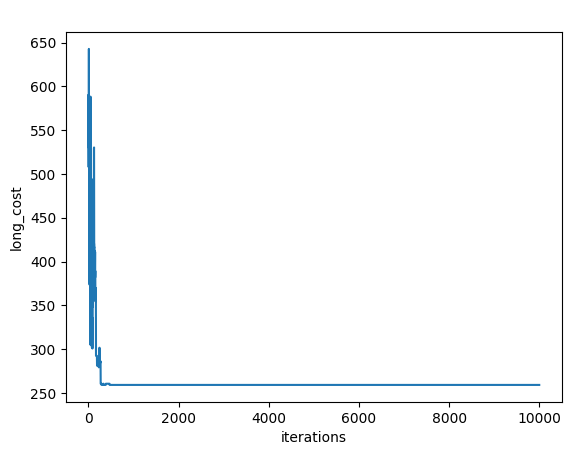

最佳路径: [2, 6, 9, 5, 0, 3, 7, 8, 1, 4]
最佳路径长度: 259.17401499348836


In [8]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt

# 随机生成十个城市的坐标
cities = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(10)]

# 计算两点之间的距离
def long_calulation(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return sqrt((x1 - x2)**2 + (y1 - y2)**2)

# 计算路径的总长度
def total_long(path):
    return sum(long_calulation(cities[path[i]], cities[path[i + 1]]) for i in range(len(path) - 1)) + long_calulation(cities[path[-1]], cities[path[0]])

# 生成一个新的路径
def new_long(path):
    new_path = path[:]  # 复制一个与 path 相同的列表
    i, j = random.sample(range(len(path)), 2)  # 从 path 中随机选取两个城市序号
    new_path[i], new_path[j] = new_path[j], new_path[i]  # 使这两个城市的位置交换
    return new_path  # 返回新的路径

# 选择新旧路径的概率
def chioce(old_jie, new_jie, temperature):
    if new_jie < old_jie:  # 如果新路径的长度更短，则直接选择
        return 1.0
    else:
        return math.exp(-(new_jie - old_jie) / temperature)  # 如果新路径更长，则按照概率选择

# 模拟退火算法
def simulated_annealing(initial_path, max_iterations, initial_temperature, cooling_rate):
    current_path = initial_path  # 当前路径
    best_path = current_path  # 最优路径
    best_cost = total_long(current_path)  # 最优路径的总长度
    cost = best_cost
    energy = [total_long(current_path)]  # 记录每一次得到的路径长度

    for iteration in range(max_iterations):
        new_path = new_long(current_path)
        new_cost = total_long(new_path)
        if random.random() < chioce(cost, new_cost, initial_temperature):
            current_path = new_path
            cost = new_cost
            
        if cost < best_cost:  # 如果新的路径长度更短，则更新最优路径
            best_path = current_path
            best_cost = cost
        initial_temperature *= cooling_rate  # 更新温度
        energy.append(cost)  # 记录本次迭代的路径长度

    return best_path, best_cost, energy

# 初始化路径
initial_path = list(range(len(cities)))
random.shuffle(initial_path)

# 参数设置
max_iterations = 10000
initial_temperature = 100
cooling_rate = 0.99

# 执行模拟退火
best_path, best_cost, energy = simulated_annealing(initial_path, max_iterations, initial_temperature, cooling_rate)

# 绘制路径长度的变化
plt.figure()
plt.plot(range(max_iterations + 1), energy)
plt.xlabel('iterations')
plt.ylabel('long_cost')
plt.title(' ')
plt.show()

# 输出最佳路径和其总长度
print("最佳路径:", best_path)
print("最佳路径长度:", best_cost)

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt
cities = [
    (random.uniform(0,100),random.uniform(0,100)) for _ in range(10)
]
#随机生成十个城市，坐标在0到100间
def long_calulation(city1, city2):
    x1 , y1 = city1
    x2 , y2 = city2
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
def total_long(path):
    return sum(long_calulation(cities[path[i]], cities[path[i + 1]]) for i in range(len(path) - 1)) + distance(cities[path[-1]], cities[path[0]])
def new_long(path):
    new_path = path[:]  #复制一个更path一样的数组
    i, j = random.sample(range(len(path)), 2) #从path中有点城市序号中随意选取两个
    new_path[i], new_path[j] = new_path[j], new_path[i] #使其交换
    return new_path #返回新的path
def chioce(old_jie,new_jie,temperature):
    if new_jie < old_jie: #低于的时候之间选择
        return 1.0
    else:
        return math.exp(-(new_jie - old_jie)**2 / temperature) #高于的时候有机率选择
def stimulated__annealing(initial_path, max_iterations, initial_temperature, cooling_rate):
    current_path = initial_path #current_path  是变化改变在每次迭代
    best_path = current_path #best_path用于储存最优解，先初始化
    best_cost = total_long(current_path) #best_cost用于存储最优解，先初始化
    cost = best_cost
    
    for iterations in range(max_iterations):
        new_paths = new_long(current_path)
        new_sum = total_long(new_paths)
        if random.random() < chioce(cost, new_sum, temperature):
            current_path = new_paths
            cost = new_sum
            
        if cost < best_cost: #如果消耗更小，说明是我们要的解，储存在best_cost中
            best_path = current_path
            best_cost = cost
        temperature *= cooling_rate #温度变化
        
    return best_path, best_cost  

 #初始化路径
initial_path = list(range(len(cities)))
random.shuffle(initial_path)

# 参数设置
max_iterations = 10000
initial_temperature = 100
cooling_rate = 0.99

# 执行模拟退火
best_path, best_cost = simulated_annealing(initial_path, max_iterations, initial_temperature, cooling_rate)
# 输出最佳路径和其总距离
print("Best Path:", best_path)
print("Best Cost:", best_cost)  

遗传算法：重点在设置突变和基因重组

操作包括：初始群体的产生，求每一个个体的适应度，自然选择或人工选择优良个体，被选出的优良个体两两配对，通过随机交叉基因重组并加入基因突变来产生新的群体，逐代进化

画流程图

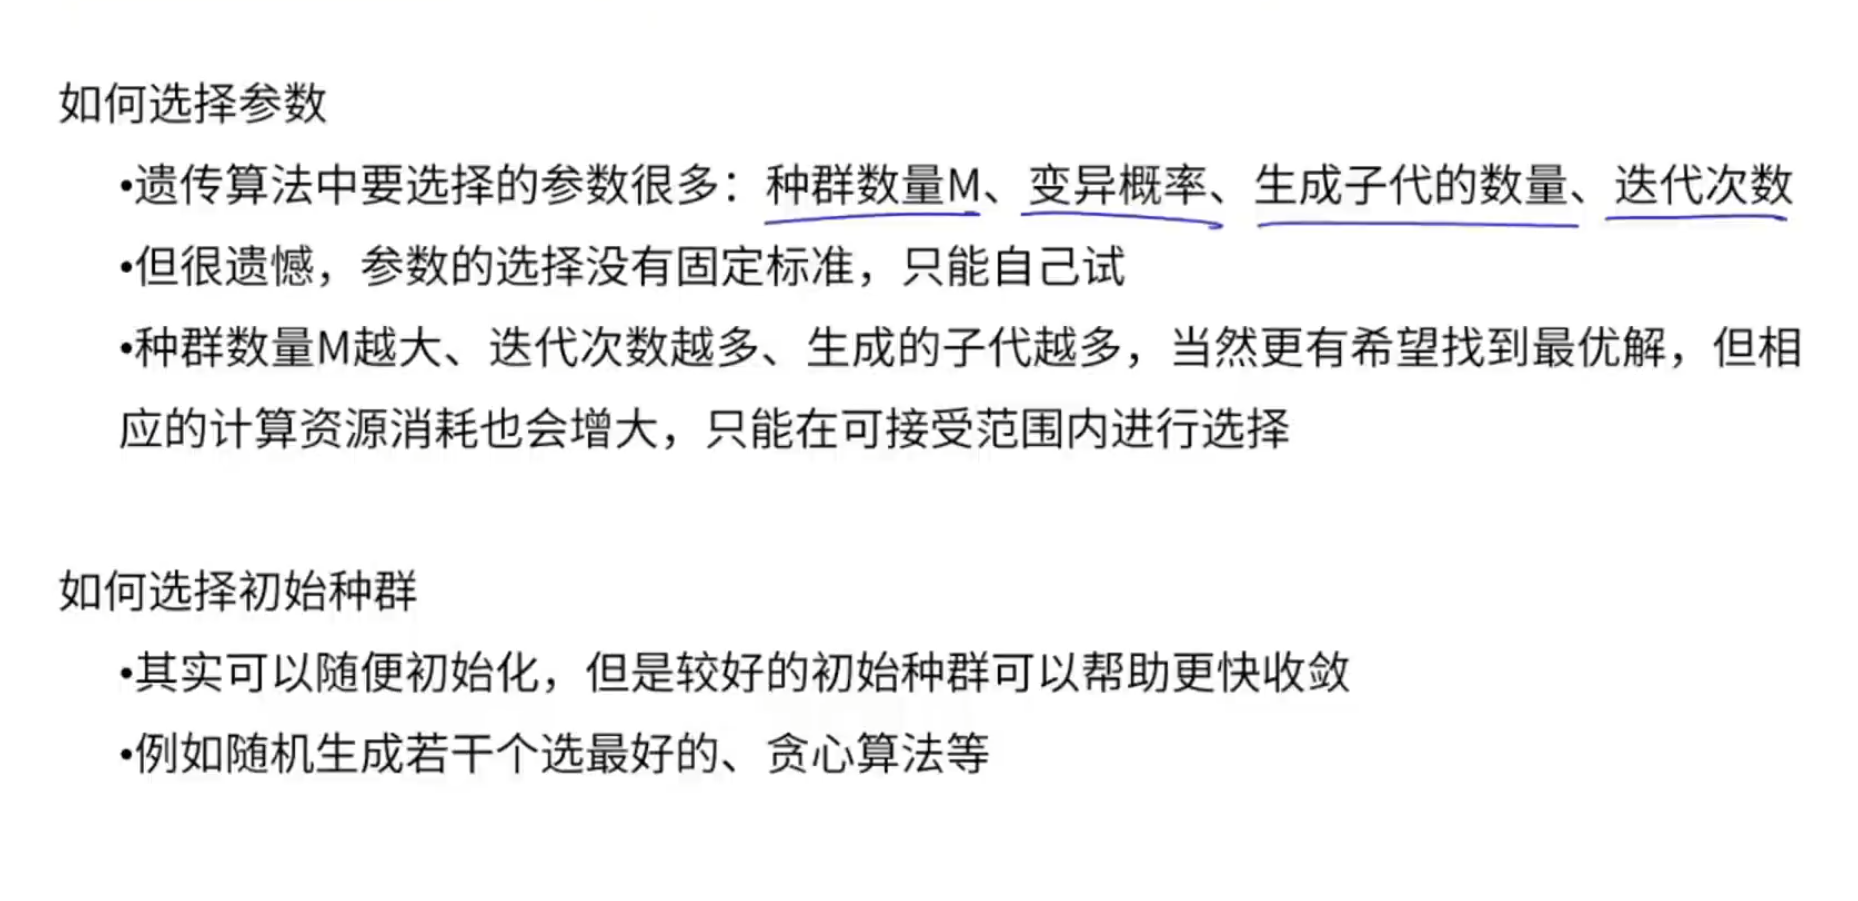

In [3]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-27 141624.png")

In [ ]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-27 141743.png")

蚁群算法

直观求路径

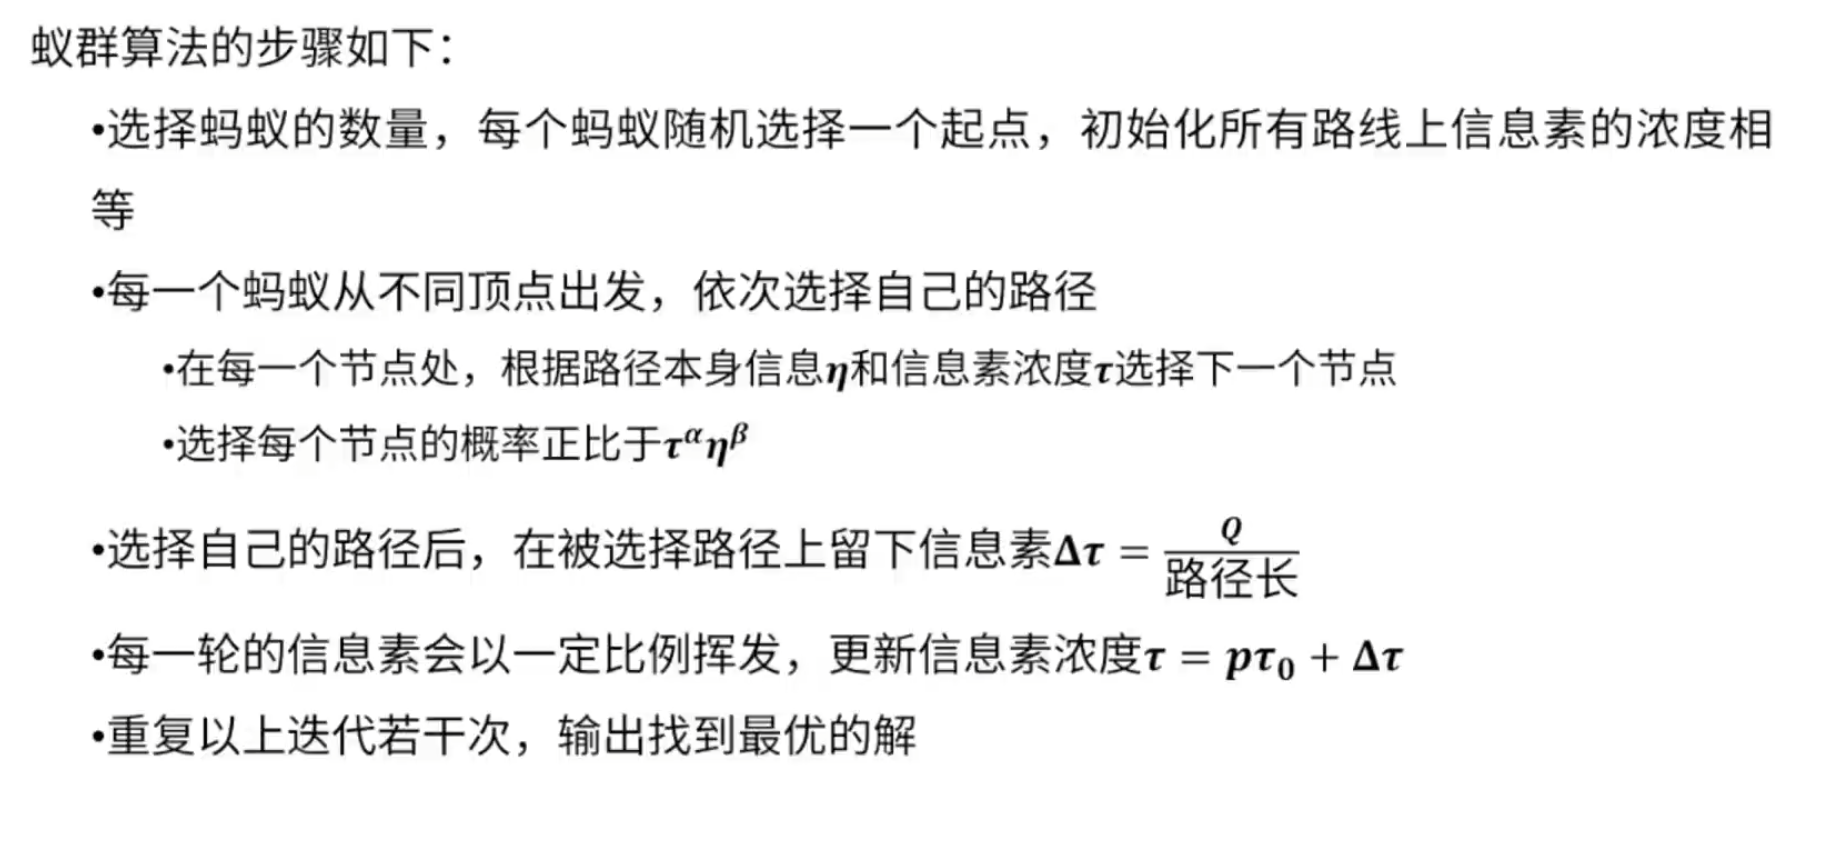

In [4]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-27 142211.png")


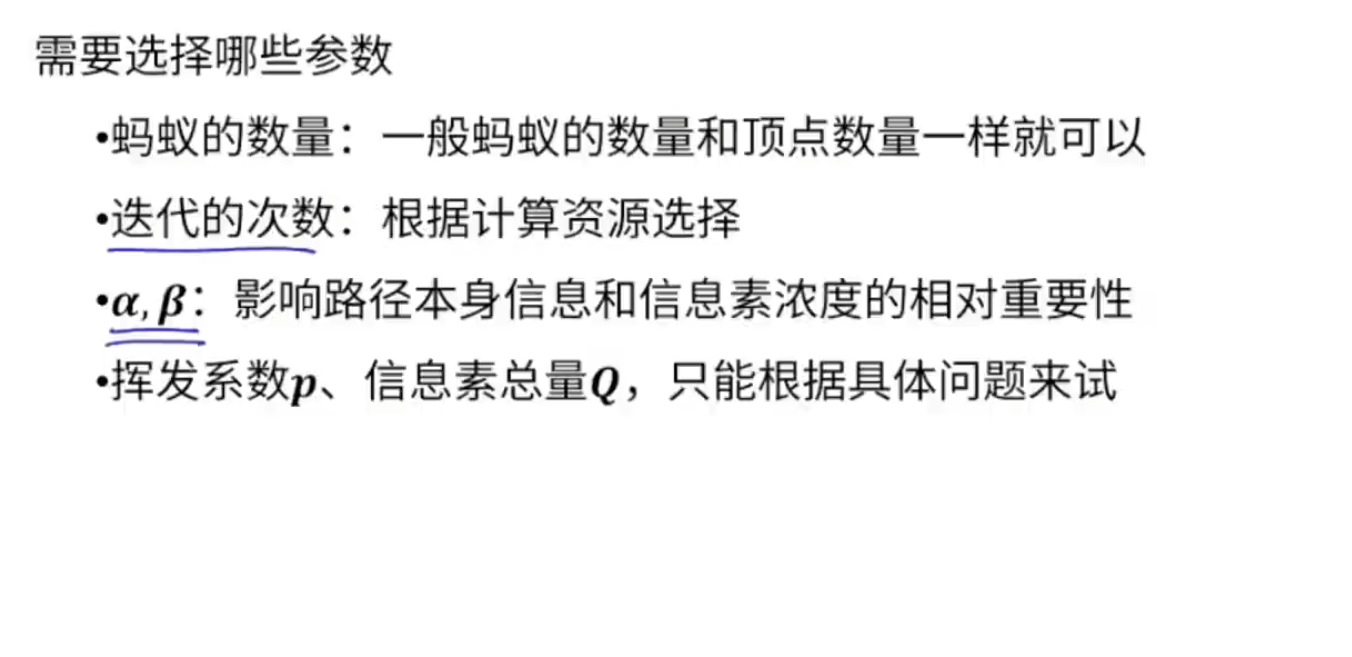

In [5]:
from IPython.display import Image
Image(filename="C:/Users/dash2/Pictures/Screenshots/屏幕截图 2024-07-27 142522.png")

In [45]:
import numpy as np
import random
# 定义城市间的距离矩阵
# 图论
city = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
# 蚁群算法参数
ANT_COUNT = 10  # 蚂蚁数量
EVAPORATION_RATE = 0.5  # 信息素蒸发率
PHEROMONE_INIT = 1.0 # 初始信息素浓度
ALPHA = 1.0  # 信息素重要性因子
BETA = 5.0  # 启发信息重要性因子
ITERATIONS = 100  # 迭代次数
# path 是一个整数列表，代表了一条经过所有城市的路径。例如，[0, 2, 3, 1] 表示从城市0开始，经过城市2，然后城市3，最后回到城市1的路径。

def distance_calcullate(path):
    distance = 0
    for i in range(len(city)):
        distance = distance + city[path[i]][path[i + 1]] #根据矩阵的性质查找的城市距离在表上
    distance = distance + city[path[-1]][path[0]]
    return distance
def initial_pheronmones(PHEROMONE_INIT):
    pheromones = np.full((len(city),len(city)),PHEROMONE_INIT) #将初始信息素构建成 ()里面是shape，第二位是填充数
    np.fill_diagonal(pheromones,0) #每个城市到自身没有道路所有要设为0
    return pheromones
def update_pheronmones(all_path, all_distances, pheronmones):
    new_pheromones = pheronmones * EVAPORATION_RATE  #每一次迭代的时候发生
    for path,distance in zip(all_path,all_distances): #将这两个量整合成元组
        new_pheromones[path,np.roll(path,-1)] += 1/distance #path,np.roll(path,-1)表示这个城市到下一个城市的距离，同样是利用邻接矩阵的性质
    return new_pheromones
def choose_next_one(current_city,un_city,pheromones,city):
    n = len(un_city) 
    p = np.zeros(n) #初始化选择概率矩阵
    total_p = 0
    # 计算每个未访问城市被选中的概率 alpha beta可自行发挥,表示信息素和距离影响选择
    for i, next_city in enumerate(un_city): #使用 enumerate 函数可以同时获取列表中的索引和值。
        # 这里 i 是索引，next_city 是未访问城市列表中的下一个城市。
        prod = (pheromones[current_city][next_city] ** ALPHA) * ((1.0 / city[current_city][next_city]) ** BETA)
        total_p += prod
        p[i] = prod
    p = p / total_p #归一化概率
    choose_city = random.choices(un_city, p)[0]#返回单个城市阿，而不是列表
    return choose_city

def constractions(pheromones , distance):
    solutions = []
    all_distance = []
    for i in range(ANT_COUNT):
        un_city = list(range(len(city)))
        current_city = random.choice(un_city) #随机选择起点
        un_city.remove(current_city)
        solution = [current_city]
        
        while un_city:
            next_city = choose_next_one(current_city, un_city, pheromones,city)
            solution.append(next_city)
            un_city.remove(next_city)
            current_city = next_city
        
        #回到起点 solution即为第一种路径执行
        solution.append(solution[0])
        solutions.append(solution)
        all_distance.append(distance_calcullate(solution))
    return solutions , all_distance
def ant_optimization():
    pheromones = initial_pheronmones(PHEROMONE_INIT)
    for iterations in range(ITERATIONS):
        all_path , all_distance = constractions(pheromones, distance_calcullate)
        min_distance = min(all_distance)
        best_path = all_path[all_distance.index(min_distance)] #index() 函数用于从序列s中找出某个值第一个出现时的索引位置。
        pheromones = update_pheronmones(best_path, all_distance, pheromones)
        
        return min_distance, best_path
    
ant_optimization()
print('最短路程极其最优路径',min_distance, best_path)
    
    

最短路程极其最优路径 80 [0, 2, 3, 1, 0]


In [35]:
import numpy as np
import random

# 定义城市间的距离矩阵
city = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

# 蚁群算法参数
ANT_COUNT = 10  # 蚂蚁数量
EVAPORATION_RATE = 0.5  # 信息素蒸发率
PHEROMONE_INIT = 1.0  # 初始信息素浓度
ALPHA = 1.0  # 信息素重要性因子
BETA = 5.0  # 启发信息重要性因子
ITERATIONS = 100  # 迭代次数

def distance_calcullate(path):
    distance = 0
    for i in range(len(path) - 1):
        distance += city[path[i]][path[i + 1]]
    distance += city[path[-1]][path[0]]  # 回到起点
    return distance

def initial_pheromones(PHEROMONE_INIT):
    pheromones = np.full((len(city), len(city)), PHEROMONE_INIT)
    np.fill_diagonal(pheromones, 0)  # 对角线为0，表示城市到自身没有道路
    return pheromones

def update_pheromones(all_path, all_distances, pheromones):
    new_pheromones = pheromones * EVAPORATION_RATE  # 蒸发
    for path, distance in zip(all_path, all_distances):
        for i in range(len(path) - 1):
            new_pheromones[path[i]][path[i + 1]] += 1.0 / distance
        new_pheromones[path[-1]][path[0]] += 1.0 / distance  # 回到起点
    return new_pheromones

def choose_next_one(current_city, un_city, pheromones):
    p = []
    for next_city in un_city:
        p.append((pheromones[current_city][next_city] ** ALPHA) *
                 ((1.0 / city[current_city][next_city]) ** BETA))
    p = np.array(p) / sum(p)  # 归一化概率
    next_city = random.choices(un_city, p)[0]
    return next_city

def construct_solutions(pheromones):
    solutions = []
    all_distances = []
    for _ in range(ANT_COUNT):
        un_city = list(range(len(city)))
        current_city = random.choice(un_city)
        un_city.remove(current_city)
        solution = [current_city]

        while un_city:
            next_city = choose_next_one(current_city, un_city, pheromones)
            solution.append(next_city)
            un_city.remove(next_city)
            current_city = next_city

        solution.append(solution[0])  # 回到起点
        solutions.append(solution)
        all_distances.append(distance_calcullate(solution))
    return solutions, all_distances

def ant_optimization():
    pheromones = initial_pheromones(PHEROMONE_INIT)
    best_path = None
    min_distance = float('inf')

    for _ in range(ITERATIONS):
        all_path, all_distances = construct_solutions(pheromones)
        iteration_min_distance = min(all_distances)
        iteration_best_path = all_path[all_distances.index(iteration_min_distance)]
        
        if iteration_min_distance < min_distance:
            min_distance = iteration_min_distance
            best_path = iteration_best_path

        pheromones = update_pheromones(all_path, all_distances, pheromones)
        
    return min_distance, best_path

min_distance, best_path = ant_optimization()
print('最短路程:', min_distance)
print('最优路径:', best_path)


最短路程: 80
最优路径: [2, 0, 1, 3, 2]


可视化蚁群

{(0, 1): Text(0.21256055562226328, 0.6456980149990008, '0.16764124668700767'),
 (0, 2): Text(0.5217674502280326, -0.3456865194283021, '0.08235875331299235'),
 (0,
  3): Text(-0.01611061414688919, -0.008613720801753377, '5.2064819744586776e-30'),
 (1, 0): Text(0.21256271570864327, 0.6456965014672076, '0.08235875331299235'),
 (1,
  2): Text(0.016111713631721147, 0.008615670572200251, '4.959801017496566e-27'),
 (1, 3): Text(-0.5217685534948326, 0.34568358418807055, '0.16764124668700767'),
 (2, 0): Text(0.5217662891088403, -0.34569028492110243, '0.16764124668700767'),
 (2,
  1): Text(0.01611254387569394, 0.008613008612185835, '1.4127253242657972e-28'),
 (2,
  3): Text(-0.21256111872786498, -0.6456975821837577, '0.08235875331299235'),
 (3,
  0): Text(-0.016113643360525676, -0.008614958382633153, '5.095867067948687e-27'),
 (3, 1): Text(-0.5217651858420398, 0.34569322016133386, '0.08235875331299235'),
 (3, 2): Text(-0.21256215260304145, -0.645696934282451, '0.16764124668700767')}

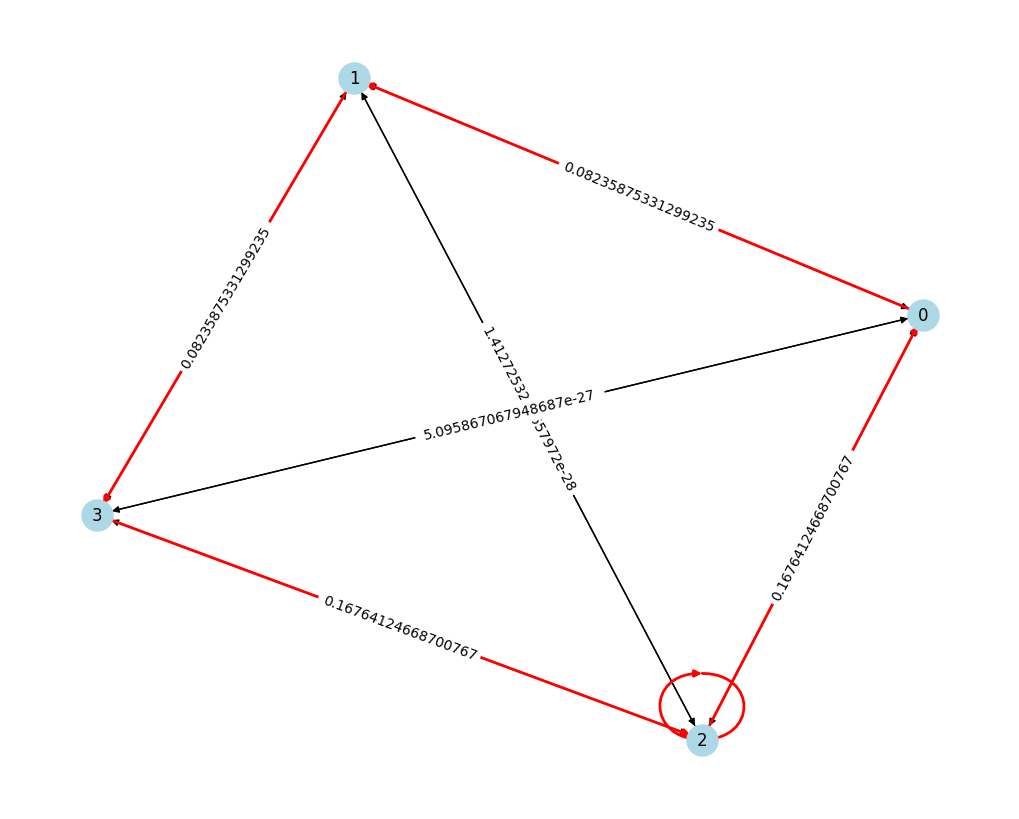

In [44]:
import networkx as nx
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
G = nx.DiGraph()
for i in range(len(city)):
    for j in range(len(city)):
        if i != j:
            G.add_edge(i,j,weight=pheromones[i][j]) #pheromones可以代表权重，
pos = nx.spring_layout(G)
edges = G.edges(data=True)
nx.draw(G, pos, node_size=500, with_labels=True, node_color='lightblue')

# 绘制最佳路径
best_edges = [(best_path[i], best_path[i + 1]) for i in range(len(best_path) - 1)]
best_edges.append((best_path[-1], best_path[0]))
nx.draw_networkx_edges(G, pos, edgelist=best_edges, edge_color='r', width=2)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)